### DML 2 Fraudulent Claim on Cars Physical Damage

### Import of  Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score,classification_report
from sklearn.metrics import roc_curve, auc,ConfusionMatrixDisplay,roc_auc_score


## Function 

In [2]:
def drop_columns(dataframe, columns_to_drop):
    """
    Drops specified columns from a pandas DataFrame inplace.
    Returns:
    None
    """
    dataframe.drop(columns=columns_to_drop, inplace=True)    

In [3]:
def missing_values(Dataframe):
    '''To Check the missing Values in Data  Frame'''
    Feature=[]
    missing_values=[]
    Percentage_of_Missing_Values=[]
    Matrix=pd.DataFrame()
    for i in df.columns:
        a=df[i].isnull().sum()
        if a > 0:
            b=a/len(df)*100
            missing_values.append(a)
            Feature.append(i)
            Percentage_of_Missing_Values.append(b)
    Matrix["Feature"]=Feature
    Matrix["Missing Values"]=missing_values
    Matrix["Percentage of Missing Values"]=Percentage_of_Missing_Values
    Matrix=Matrix.sort_values(by="Percentage of Missing Values", ascending=False)
    return Matrix 


In [4]:
def cat_feature(dataframe):
    '''To Check The Category column in Data frame'''
    cat=[]
    for col in dataframe.columns:
        if df[col].dtype == 'object':
            cat.append(col)
    return cat 

In [5]:
def numerical_feature(dataframe):
    num=[]
    for col in dataframe.columns:
        if dataframe[col].dtype in ['float64', 'int64']:
            num.append(col)
    return num

In [6]:
def unique_feature_values(Dataframe, columns):
    unique_values = []
    for feature in columns:
        unique_values.append((feature,Dataframe[feature].unique()))
    return unique_values


#### Adopting the KDD Methodologies
Step 1: Data Collection

Step 2: Pre-processing and Exploring the data

Step 3: Data Preparation

Step 4: Model Training

Step 5: Evaluating Model Performance

Step 6: Improving Model Performance

## Step 1. Data Collection 

In [7]:
df=pd.read_csv(r"C:\Users\Aniket\Desktop\DML project\Fraudulent Claim on Cars Physical Damage.csv")

In [8]:
df.head(5)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [9]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

In [10]:
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


## Setp-2 

###  Cleaning and EDA 

In [11]:

# Calling fuction to check missing values 
missing_values(df)

,Feature,Missing Values,Percentage of Missing Values
1,witness_present_ind,132,0.733415
2,claim_est_payout,17,0.094455
3,age_of_vehicle,8,0.044449
0,marital_status,5,0.027781


### Only three column has the null values 
those are 
1. marital_status               5 
2. witness_present_ind        132
3. claim_est_payout            17
4. age_of_vehicle               8

In [12]:
# verify the unique values of these column 
column=['marital_status','witness_present_ind','claim_est_payout' ,'age_of_vehicle']
unique_feature_values(df,column)

[('marital_status', array([ 1.,  0., nan])),
 ('witness_present_ind', array([ 0.,  1., nan])),
 ('claim_est_payout',
  array([7530.940993, 2966.024895, 6283.888333, ..., 2225.803056,
         9560.744844, 5166.91527 ])),
 ('age_of_vehicle',
  array([ 9.,  4.,  3.,  7.,  8.,  5.,  6.,  2., 10.,  1., 12., 13., 11.,
          0., nan, 14., 16., 15.]))]

#### All are Value so just replacing each with mean 

In [13]:
df['marital_status']=df['marital_status'].fillna(0)
df['claim_est_payout']=df['claim_est_payout'].fillna(df['claim_est_payout'].mean())
df['witness_present_ind']=df['witness_present_ind'].fillna(0)
df['age_of_vehicle']=df['age_of_vehicle'].fillna(df['age_of_vehicle'].mean())

In [14]:
# Calling fuction to check missing values 
missing_values(df)

,Feature,Missing Values,Percentage of Missing Values


In [15]:
# no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17998 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

### claim number is just the index so droping it 

In [16]:
drop_columns(df,'claim_number')

In [17]:
# no duplicate values in data frame 
df.duplicated().sum()

0

In [18]:
df.describe()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000
mean,43.695466,0.712524,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.230970,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,11.959819,0.452598,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.421465,33.678470,0.489773,2214.659783,2.257889,11988.429767,12052.385584,0.363303
min,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3339.205052,3.000000,14279.574850,14164.122133,0.000000
50%,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4671.827763,5.000000,20948.879250,20838.150260,0.000000
75%,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6254.708103,6.000000,29562.232780,29430.446293,0.000000
max,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


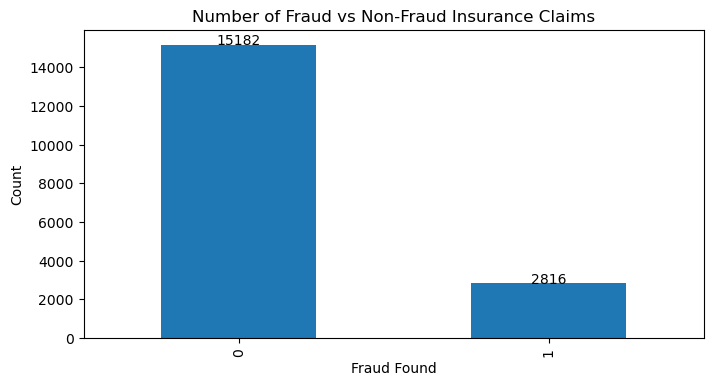

In [19]:
# Count the number of fraud cases
fraud_counts = df['fraud'].value_counts()

# Create a bar plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
fraud_counts.plot(kind='bar', ax=ax)
# Add value labels to the bars
for i, v in enumerate(fraud_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center')
# Set the plot title and axis labels
ax.set_title('Number of Fraud vs Non-Fraud Insurance Claims')
ax.set_xlabel('Fraud Found')
ax.set_ylabel('Count')

plt.show()


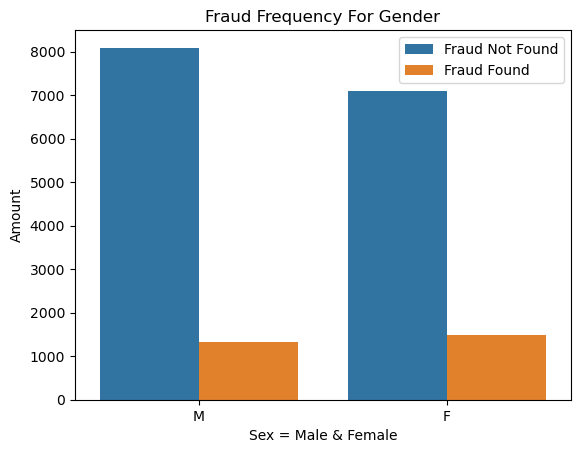

In [20]:
sns.countplot(x=df['gender'],hue='fraud',data=df)
plt.title("Fraud Frequency For Gender")
plt.xlabel("Sex = Male & Female")
plt.ylabel("Amount")
plt.legend(["Fraud Not Found","Fraud Found"])
plt.xticks(rotation = 0);

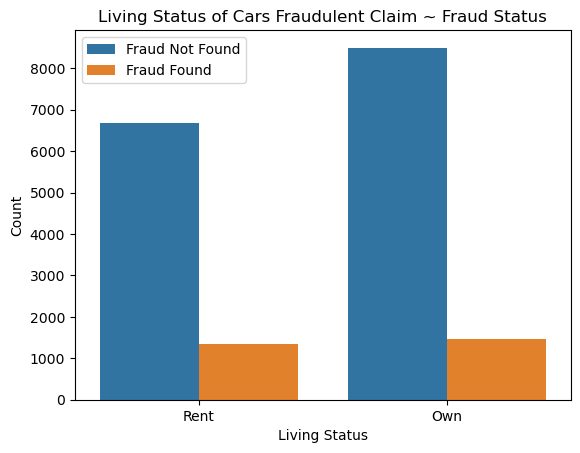

In [21]:
sns.countplot(x=df['living_status'],hue='fraud',data=df)
plt.title("Living Status of Cars Fraudulent Claim ~ Fraud Status")
plt.xlabel("Living Status")
plt.legend(["Fraud Not Found","Fraud Found"])
plt.ylabel("Count")
plt.show()

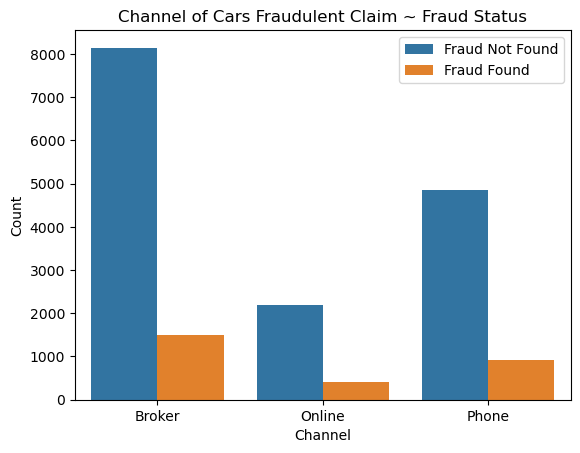

In [22]:
sns.countplot( x = 'channel', hue = 'fraud',data=df)
plt.title("Channel of Cars Fraudulent Claim ~ Fraud Status")
plt.xlabel("Channel")
plt.legend(["Fraud Not Found","Fraud Found"])
plt.ylabel("Count")
plt.show()

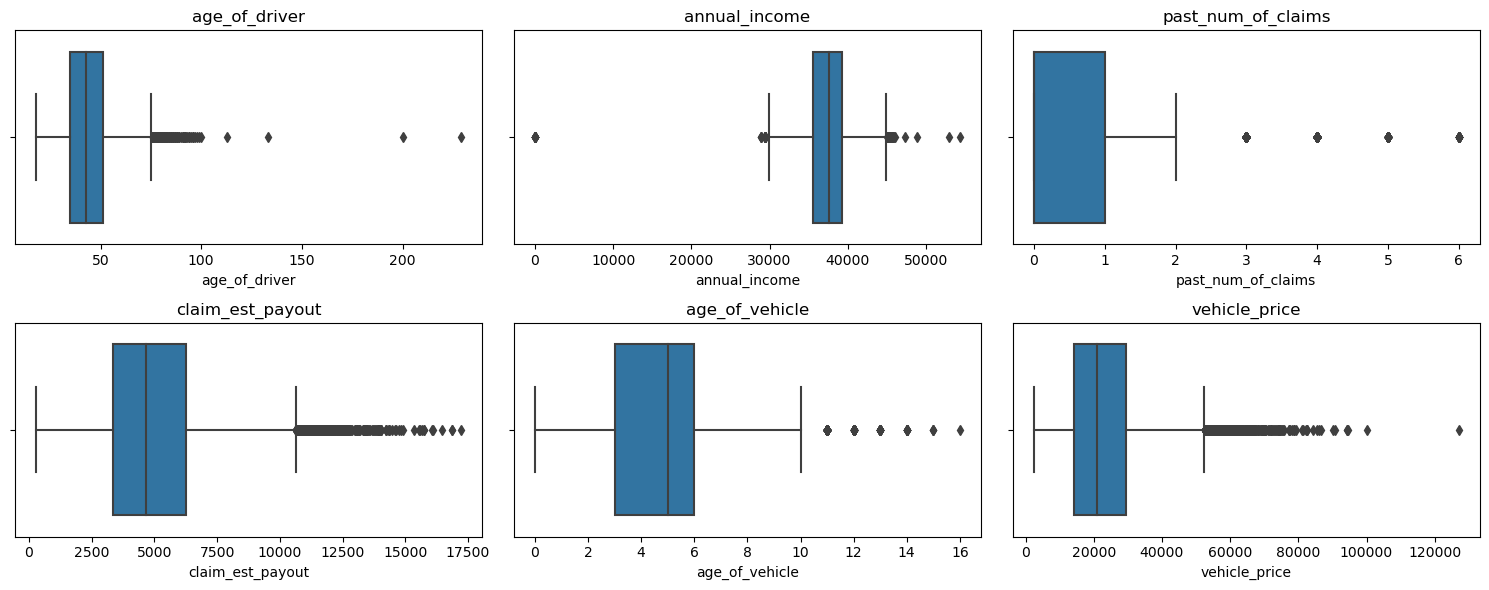

In [23]:
box_feature=['age_of_driver','annual_income','past_num_of_claims','claim_est_payout',
 'age_of_vehicle',
 'vehicle_price']
plt.figure(figsize=(15,6))

for i, feature in enumerate(box_feature):
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [24]:
#as we have less data we trim the values seeing the box plot remove outliers 188values removed
df=df[~(df["vehicle_price"]>=900000)]
df=df[~(df["age_of_driver"]>=80)]
df=df[~(df["claim_est_payout"]>=12500)]
df=df[~(df["annual_income"]>=45000)]

In [25]:
df.shape

(17812, 24)

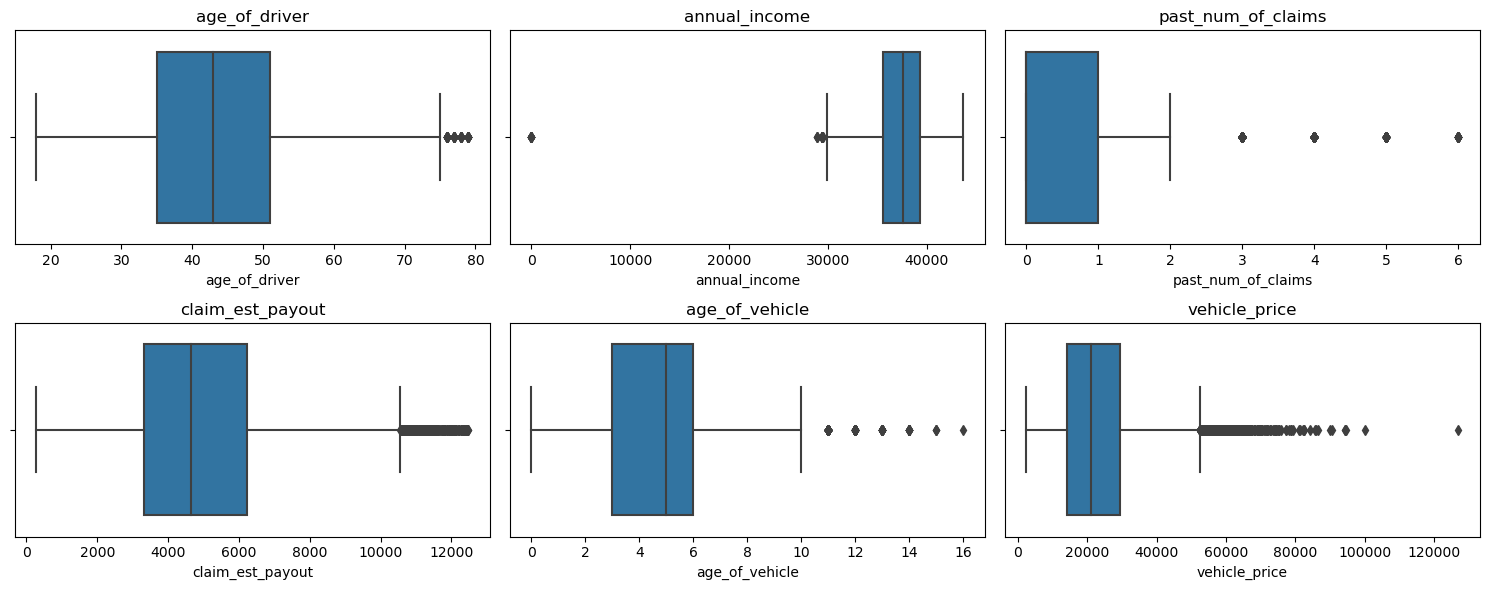

In [26]:
box_feature=['age_of_driver','annual_income','past_num_of_claims','claim_est_payout',
 'age_of_vehicle',
 'vehicle_price']
plt.figure(figsize=(15,6))

for i, feature in enumerate(box_feature):
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()

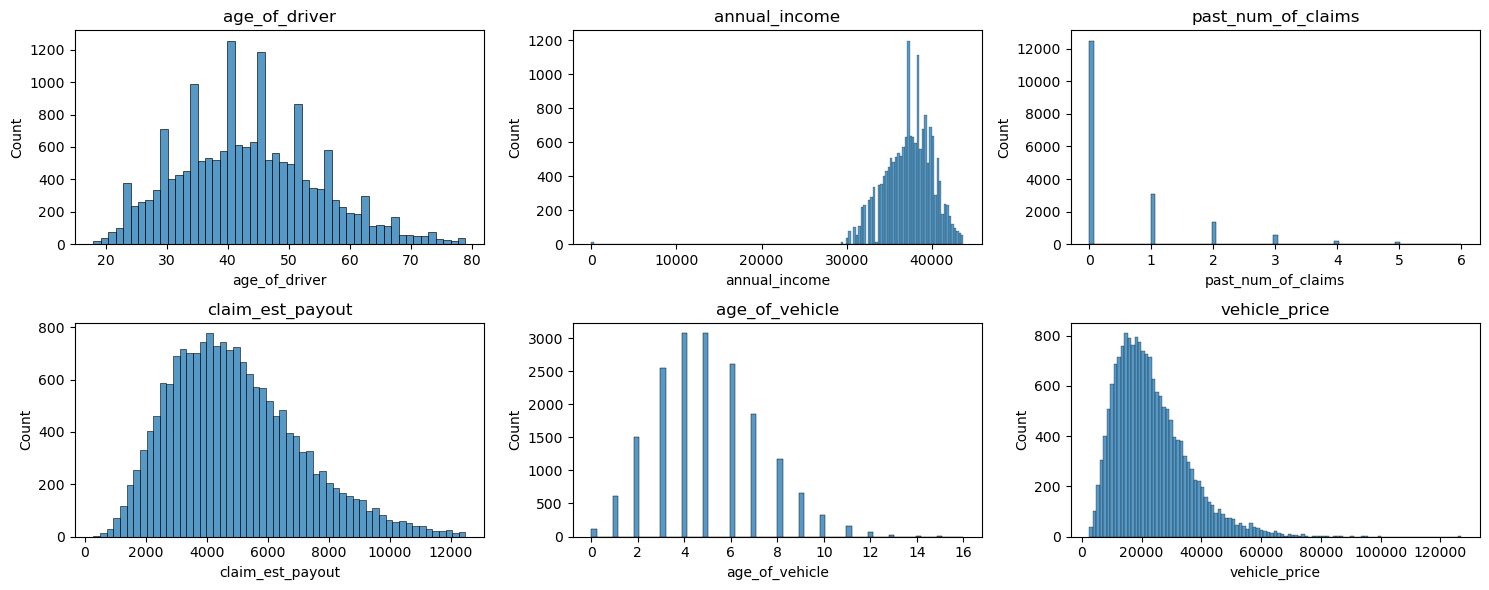

In [27]:
box_feature=['age_of_driver','annual_income','past_num_of_claims','claim_est_payout',
 'age_of_vehicle',
 'vehicle_price']
plt.figure(figsize=(15,6))

for i, feature in enumerate(box_feature):
    ax = plt.subplot(2,3, i+1)
    sns.histplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()

## Encoding 

In [28]:
def cat_column(dataframe):
    cat=[]
    for col in dataframe.columns:
        if df[col].dtype == 'object':
            cat.append(col)
    return cat 


In [29]:
Cat_column=cat_column(df)

In [30]:
# checking the unique values of Catagorical values 
for col in Cat_column:
    print(col)
    print(df[col].unique(),"\n")

gender
['M' 'F'] 

living_status
['Rent' 'Own'] 

claim_date
['12/16/2016' '2/12/2015' '12/6/2016' '5/5/2016' '10/27/2015' '11/16/2016'
 '3/14/2015' '3/31/2015' '9/3/2015' '5/14/2016' '7/11/2015' '4/20/2015'
 '6/30/2015' '8/5/2015' '11/11/2015' '2/19/2016' '4/23/2016' '11/3/2015'
 '10/25/2015' '4/24/2015' '4/14/2016' '3/27/2016' '8/3/2016' '5/31/2015'
 '8/19/2016' '1/9/2016' '11/4/2015' '2/13/2015' '5/12/2015' '8/15/2015'
 '8/13/2015' '9/25/2016' '9/2/2016' '4/16/2016' '4/20/2016' '2/9/2016'
 '4/7/2016' '8/2/2015' '11/13/2015' '9/10/2016' '12/7/2016' '3/24/2016'
 '9/12/2016' '8/7/2015' '8/12/2016' '1/1/2016' '8/4/2016' '12/18/2016'
 '1/27/2016' '2/1/2015' '12/26/2015' '2/14/2016' '2/2/2015' '10/8/2016'
 '8/23/2015' '1/6/2015' '5/14/2015' '3/30/2015' '5/12/2016' '10/2/2015'
 '1/8/2015' '1/16/2016' '3/2/2015' '1/26/2016' '2/27/2016' '7/15/2016'
 '8/21/2015' '2/18/2015' '8/27/2016' '2/7/2016' '3/1/2016' '2/20/2016'
 '10/26/2015' '7/26/2016' '2/22/2015' '4/5/2015' '8/12/2015' '2/29/2016'
 

### It is better to drop the claim date

In [31]:
drop_columns(df,'claim_date')


In [32]:
Cat_column=cat_column(df)
# checking the unique values of Catagorical values 
for col in Cat_column:
    print(col)
    print(df[col].unique(),"\n")

gender
['M' 'F'] 

living_status
['Rent' 'Own'] 

claim_day_of_week
['Friday' 'Thursday' 'Tuesday' 'Wednesday' 'Saturday' 'Monday' 'Sunday'] 

accident_site
['Local' 'Highway' 'Parking Lot'] 

channel
['Broker' 'Online' 'Phone'] 

vehicle_category
['Compact' 'Large' 'Medium'] 

vehicle_color
['white' 'other' 'gray' 'black' 'red' 'blue' 'silver'] 



### Manually  Label Encoding

In [33]:
df['gender'] = df['gender'].replace({'F':1, 'M':0})
df['claim_day_of_week'] = df['claim_day_of_week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

### Ordinal encoading 

In [34]:
order=OrdinalEncoder()

In [35]:
Cat_column = cat_column(df)
for col in Cat_column:
    df[col] = order.fit_transform(df[col].values.reshape(-1, 1))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17812 entries, 0 to 17997
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            17812 non-null  int64  
 1   gender                   17812 non-null  int64  
 2   marital_status           17812 non-null  float64
 3   safty_rating             17812 non-null  int64  
 4   annual_income            17812 non-null  int64  
 5   high_education_ind       17812 non-null  int64  
 6   address_change_ind       17812 non-null  int64  
 7   living_status            17812 non-null  float64
 8   zip_code                 17812 non-null  int64  
 9   claim_day_of_week        17812 non-null  int64  
 10  accident_site            17812 non-null  float64
 11  past_num_of_claims       17812 non-null  int64  
 12  witness_present_ind      17812 non-null  float64
 13  liab_prct                17812 non-null  int64  
 14  channel               

<AxesSubplot:>

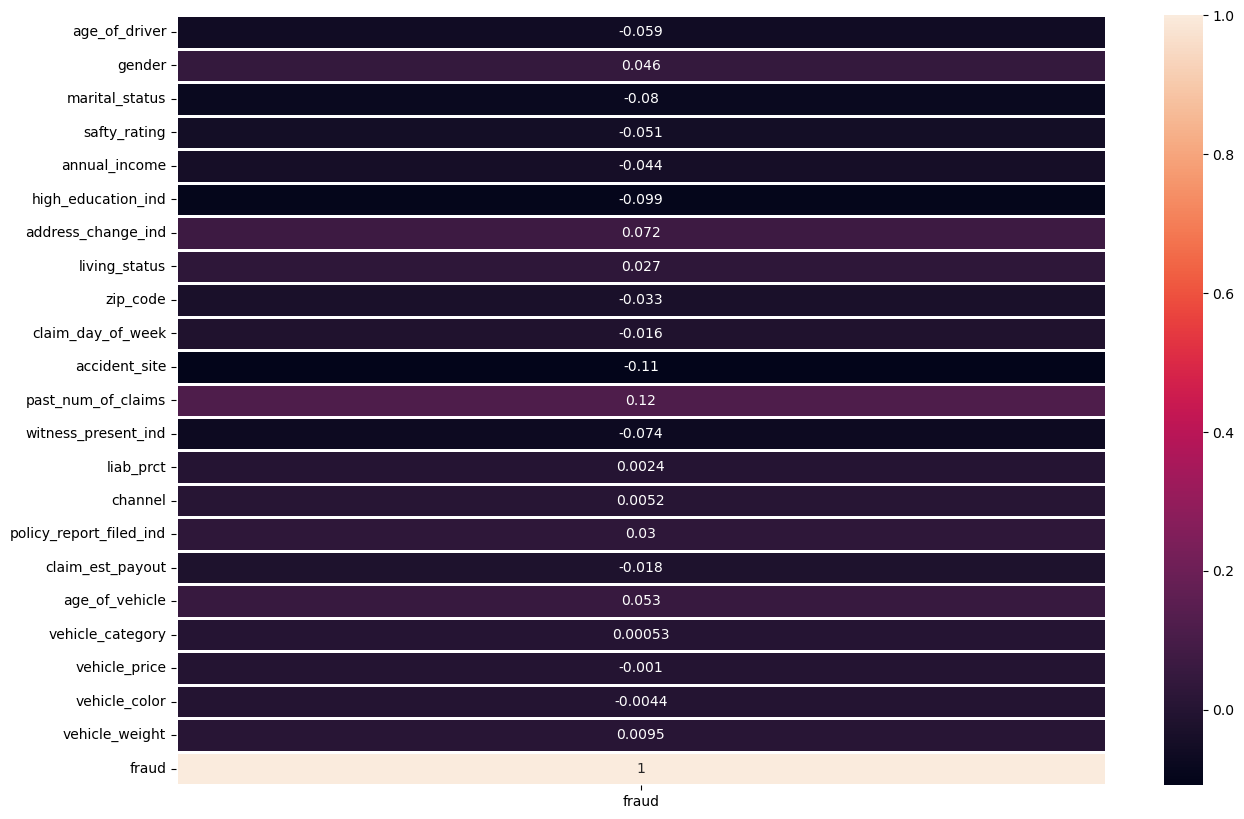

In [37]:
df.corr()['fraud'].to_frame()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()['fraud'].to_frame(), annot=True, linewidths=2)

In [38]:
# Droping few columns which are not relevet for prdiction and also not much related to target variable 
columns_to_drop=['vehicle_price','vehicle_color','vehicle_weight','liab_prct','policy_report_filed_ind','claim_day_of_week','zip_code']
drop_columns(df,columns_to_drop)

### check for multicoliniarity 

<AxesSubplot:>

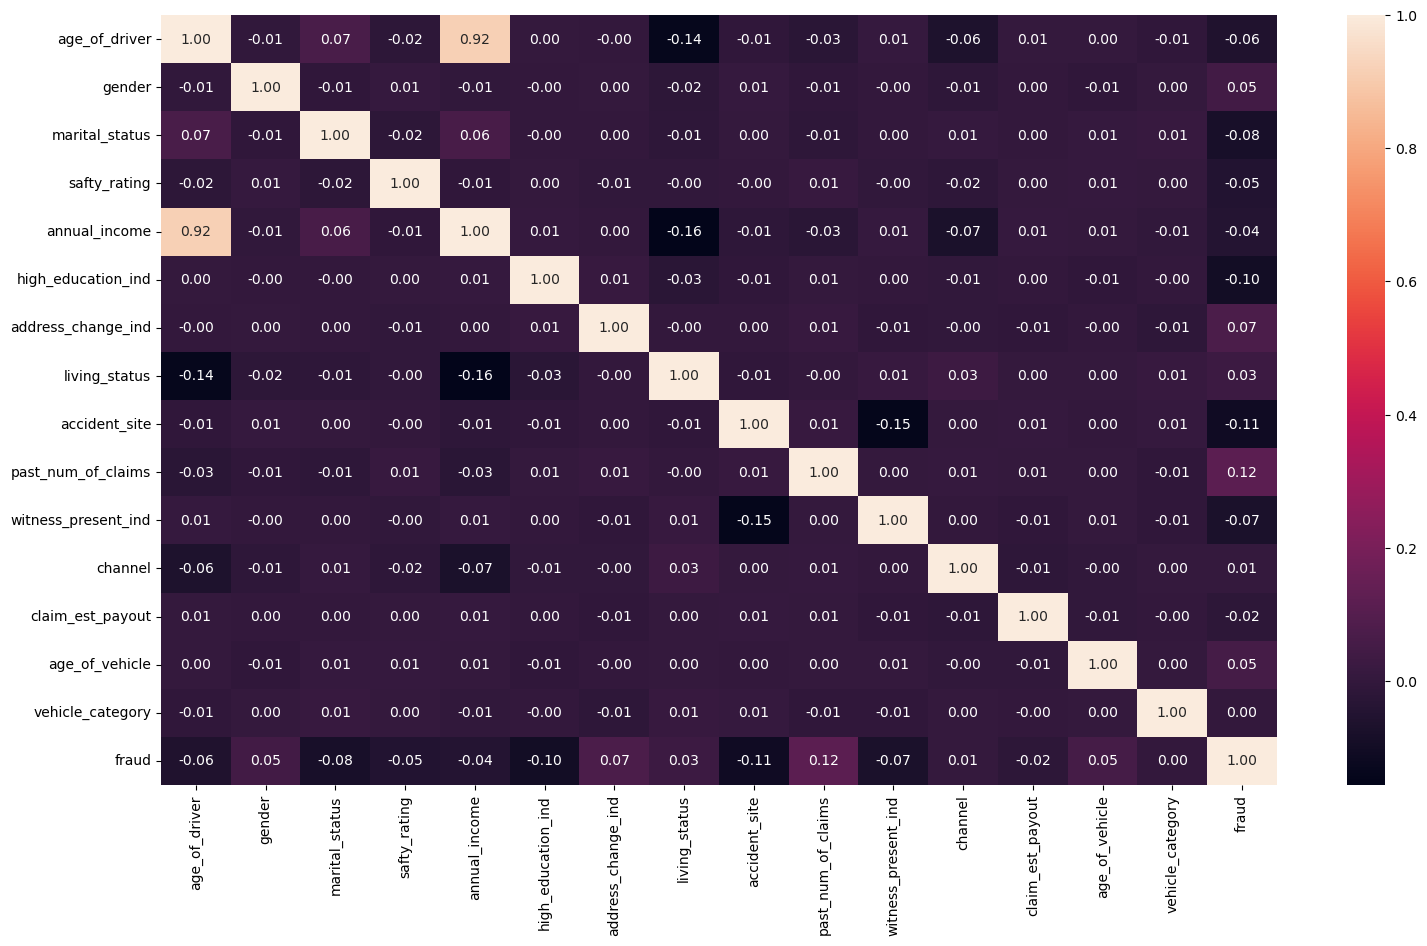

In [39]:
df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True,fmt='.2f')

In [40]:
#VIF should be less than the 10 per gausian

import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =df.columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                feature         VIF
0         age_of_driver   35.261528
1                gender    1.916393
2        marital_status    3.502504
3          safty_rating   23.233714
4         annual_income  110.560007
5    high_education_ind    3.353402
6    address_change_ind    2.373571
7         living_status    1.825504
8         accident_site    3.496320
9    past_num_of_claims    1.300600
10  witness_present_ind    1.339652
11              channel    1.762941
12     claim_est_payout    6.315596
13       age_of_vehicle    5.891544
14     vehicle_category    2.479013
15                fraud    1.272190


In [41]:
# As the annual income and age of driver are multico-related and has more than 10 value of vif so droping the annual income 
drop_columns(df,'annual_income')


#### Applying min max scaller to bring the all data into same scale 
 ##### safty_rating,
    age_of_driver,
    claim_est_payout
 ###### To Reduce the VIF 

In [42]:
from sklearn.preprocessing import MinMaxScaler
m= MinMaxScaler()
df['age_of_driver']=m.fit_transform(df[['age_of_driver']])
df[ 'safty_rating']=m.fit_transform(df[['safty_rating']])
df[ 'claim_est_payout']=m.fit_transform(df[['claim_est_payout']])

In [43]:
# Now all the data has been converted on same scale 
df

,age_of_driver,gender,marital_status,safty_rating,high_education_ind,address_change_ind,living_status,accident_site,past_num_of_claims,witness_present_ind,channel,claim_est_payout,age_of_vehicle,vehicle_category,fraud
0,0.459016,0,1.0,0.848485,1,1,1.0,1.0,1,0.0,0.0,0.594138,9.0,0.0,0
1,0.049180,1,0.0,0.747475,0,1,1.0,0.0,1,1.0,1.0,0.219955,4.0,1.0,0
2,0.508197,1,0.0,0.868687,0,1,0.0,1.0,0,0.0,0.0,0.491918,3.0,0.0,1
3,0.655738,1,1.0,0.575758,1,0,0.0,1.0,3,0.0,0.0,0.482562,4.0,2.0,1
4,0.327869,0,1.0,0.949495,1,0,1.0,0.0,0,1.0,0.0,0.349087,7.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,0.836066,0,1.0,0.929293,1,0,0.0,1.0,0,0.0,0.0,0.370846,6.0,2.0,0
17994,0.278689,1,0.0,0.212121,1,1,0.0,1.0,1,0.0,2.0,0.312070,3.0,2.0,1
17995,0.147541,1,1.0,0.808081,0,1,1.0,1.0,2,0.0,1.0,0.159280,5.0,2.0,0
17996,0.557377,1,1.0,0.858586,1,0,0.0,0.0,1,1.0,0.0,0.760520,3.0,0.0,0


## Vif after the Min max scaller 

In [44]:
vif_data = pd.DataFrame() 
vif_data["feature"] =df.columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                feature        VIF
0         age_of_driver   5.451742
1                gender   1.888171
2        marital_status   3.352263
3          safty_rating  13.239137
4    high_education_ind   3.192069
5    address_change_ind   2.321382
6         living_status   1.791365
7         accident_site   3.312494
8    past_num_of_claims   1.298154
9   witness_present_ind   1.322307
10              channel   1.732952
11     claim_est_payout   5.250075
12       age_of_vehicle   5.443672
13     vehicle_category   2.418465
14                fraud   1.245040


In [45]:
# Further more droping Saftey rating 
drop_columns(df,'safty_rating')

In [46]:
Main_df=df.copy()

### As the size of data set is small so less chance of the overfitting and 

Step 4: Model Training

Step 5: Evaluating Model Performance

Step 6: Improving Model Performance

In [47]:
X=Main_df.drop(columns=['fraud'],axis=1)
Y=Main_df['fraud']
X.shape,Y.shape
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=42 )
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((14249, 13), (3563, 13), (14249,), (3563,))

## As our outcome is  imbalance so performing Over sampling 

In [48]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [49]:
#taking random num
ros = RandomOverSampler(random_state=42)

In [50]:

#fitting training model
X_train_result, y_train_result = ros.fit_resample(X, Y)

In [51]:

#check the shape of the model
#there is increase in the number of data size to balance the over all dataset
X_train_result.shape,y_train_result.shape

((30034, 13), (30034,))

In [52]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_result)))

Original dataset shape Counter({0: 15017, 1: 2795})
Resampled dataset shape Counter({0: 15017, 1: 15017})


### In new X_train_result and Y_train_result both outcome are same 

In [53]:
# Spliting the over sampling data 
X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_train_result,y_train_result,test_size = 0.2,  random_state=42 )
X_Train_1.shape, X_Test_1.shape, Y_Train_1.shape, Y_Test_1.shape

((24027, 13), (6007, 13), (24027,), (6007,))

# Model -1

### Linear Classification using sklearn library Model :-1

In [54]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
lr = LogisticRegression(max_iter=1000)
lr.fit(X_Train, Y_Train)

y_pred = lr.predict(X_Test)

lr_train_acc = accuracy_score(Y_Train, lr.predict(X_Train))
lr_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")


Training accuracy of Logistic Regression is : 0.8413923784125201
Test accuracy of Logistic Regression is : 0.8470390120684816
Logistic Regression cohen_kappa_score : 0.03729294710065223


## Apply Grid search cv To tune the model 

In [55]:

from sklearn.model_selection import train_test_split, GridSearchCV


# Define the logistic regression model
lr = LogisticRegression()

# Define the hyperparameters to tune and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_Train, Y_Train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best hyperparameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best mean cross-validated score:  0.8421644490439583


In [56]:

# Train a new logistic regression model with the best hyperparameters
lr = LogisticRegression(**grid_search.best_params_)
lr.fit(X_Train, Y_Train)

# Make predictions on the testing set
y_pred = lr.predict(X_Test)

# Compute various performance metrics
lr_train_acc = accuracy_score(Y_Train, lr.predict(X_Train))
lr_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))



Training accuracy of Logistic Regression is : 0.842094182047863
Test accuracy of Logistic Regression is : 0.8467583497053045
Logistic Regression cohen_kappa_score : 0.0
[[3017    0]
 [ 546    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3017
           1       0.00      0.00      0.00       546

    accuracy                           0.85      3563
   macro avg       0.42      0.50      0.46      3563
weighted avg       0.72      0.85      0.78      3563



C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


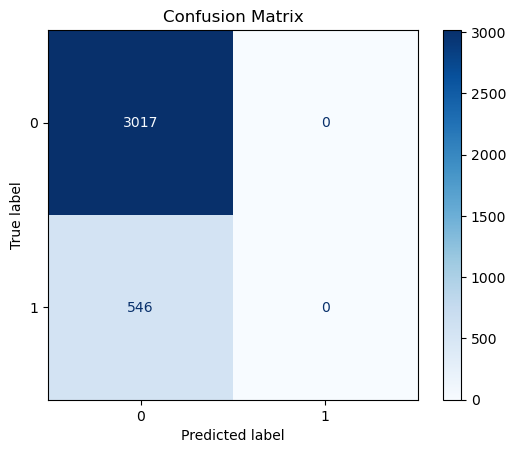

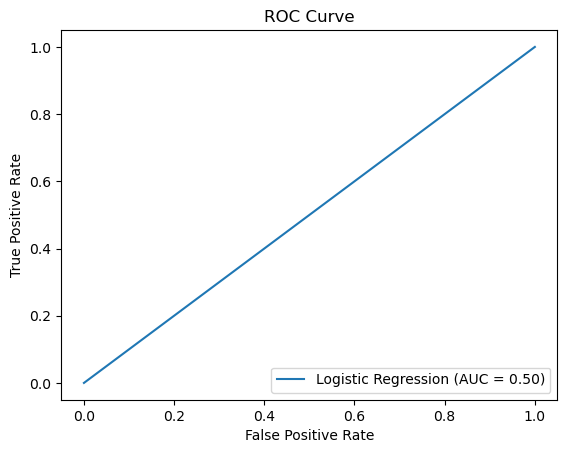

In [57]:
# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
# ROC 
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()


### Applying on Oversampled data 

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best mean cross-validated score:  0.6431100729971522
Training accuracy of Logistic Regression is : 0.6431514546135597
Test accuracy of Logistic Regression is : 0.6332611952721825
Logistic Regression cohen_kappa_score : 0.2662121722173467
[[1964 1096]
 [1107 1840]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      3060
           1       0.63      0.62      0.63      2947

    accuracy                           0.63      6007
   macro avg       0.63      0.63      0.63      6007
weighted avg       0.63      0.63      0.63      6007



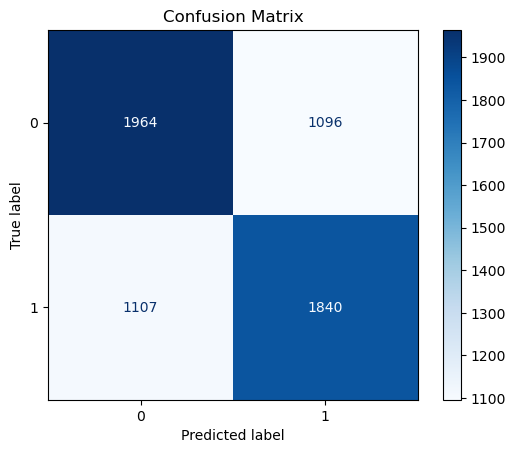

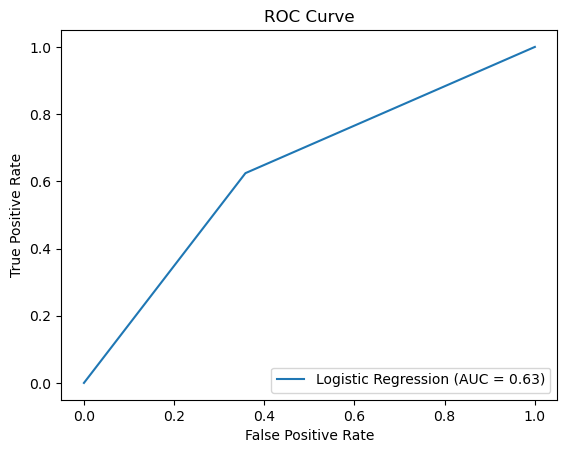

In [58]:

from sklearn.model_selection import train_test_split, GridSearchCV



# Define the logistic regression model
lr = LogisticRegression(max_iter=1000)

# Define the hyperparameters to tune and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_Train_1, Y_Train_1)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)



# Train a new logistic regression model with the best hyperparameters
lr = LogisticRegression(**grid_search.best_params_)
lr.fit(X_Train_1, Y_Train_1)

# Make predictions on the testing set
y_pred = lr.predict(X_Test_1)

# Compute various performance metrics
lr_train_acc = accuracy_score(Y_Train_1, lr.predict(X_Train_1))
lr_test_acc = accuracy_score(Y_Test_1, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")
print(confusion_matrix(Y_Test_1, y_pred))
print(classification_report(Y_Test_1, y_pred))

cm = confusion_matrix(Y_Test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()



# Model :-2  Linear Classification Using Stats Module 

Optimization terminated successfully.
         Current function value: 0.404957
         Iterations 6
Training accuracy of Logistic Regression is : 0.8413923784125201
Test accuracy of Logistic Regression is : 0.8470390120684816
Logistic Regression cohen_kappa_score : 0.03729294710065223
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3017
           1       0.52      0.03      0.05       546

    accuracy                           0.85      3563
   macro avg       0.68      0.51      0.48      3563
weighted avg       0.80      0.85      0.78      3563



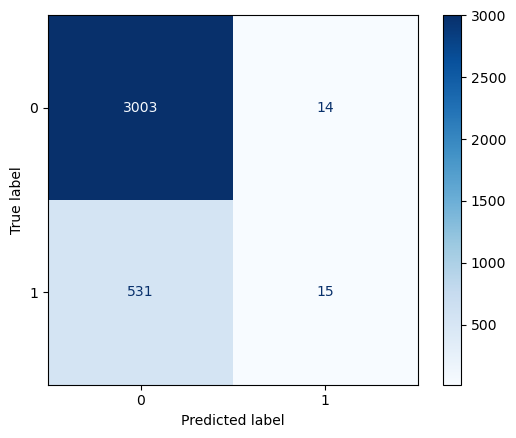

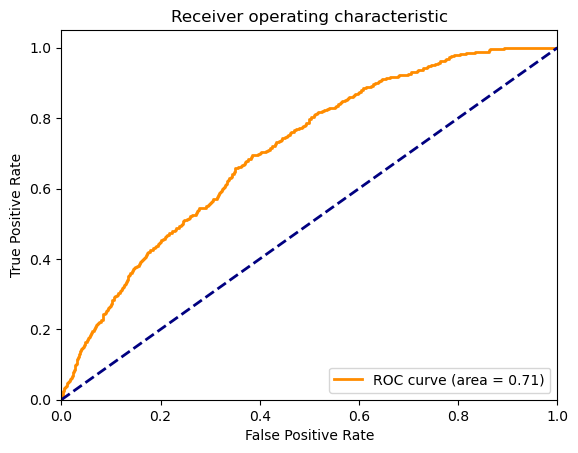

In [59]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Add a constant term to the independent variable matrix to allow statsmodels to calculate the intercept
X_Train = sm.add_constant(X_Train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(Y_Train, X_Train)
result = logit_model.fit()

# Make predictions on the testing set
X_Test = sm.add_constant(X_Test)
y_pred = result.predict(X_Test)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy and other metrics
train_acc = accuracy_score(Y_Train, (result.predict(X_Train) > 0.5).astype(int))
test_acc = accuracy_score(Y_Test, y_pred_binary)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred_binary)

print(f"Training accuracy of Logistic Regression is : {train_acc}")
print(f"Test accuracy of Logistic Regression is : {test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")

print(classification_report(Y_Test, y_pred_binary))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# create confusion matrix
cm = confusion_matrix(Y_Test, y_pred_binary)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues, values_format='.5g')

plt.show()
from sklearn.metrics import roc_curve, auc
# Compute the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




## b.On over sampled data 

In [60]:
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Add a constant term to the independent variable matrix to allow statsmodels to calculate the intercept
X_Train_1 = sm.add_constant(X_Train_1)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(Y_Train_1, X_Train_1)
result = logit_model.fit()

# Make predictions on the testing set
X_Test_1 = sm.add_constant(X_Test_1)
y_pred = result.predict(X_Test_1)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy and other metrics
train_acc = accuracy_score(Y_Train_1, (result.predict(X_Train_1) > 0.5).astype(int))
test_acc = accuracy_score(Y_Test_1, y_pred_binary)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_binary)

print(f"Training accuracy of Logistic Regression is : {train_acc}")
print(f"Test accuracy of Logistic Regression is : {test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")

print(classification_report(Y_Test_1, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.628552
         Iterations 5
Training accuracy of Logistic Regression is : 0.6431514546135597
Test accuracy of Logistic Regression is : 0.6362576993507575
Logistic Regression cohen_kappa_score : 0.27237184538706594
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      3060
           1       0.63      0.63      0.63      2947

    accuracy                           0.64      6007
   macro avg       0.64      0.64      0.64      6007
weighted avg       0.64      0.64      0.64      6007



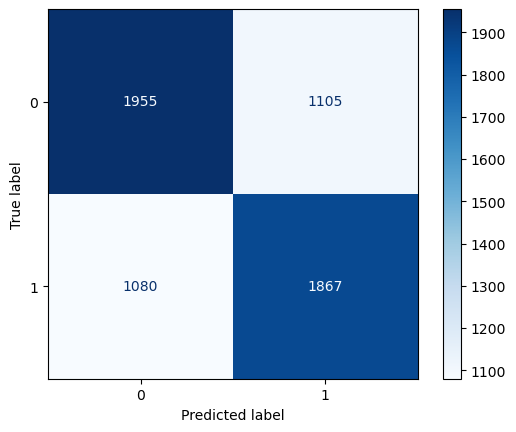

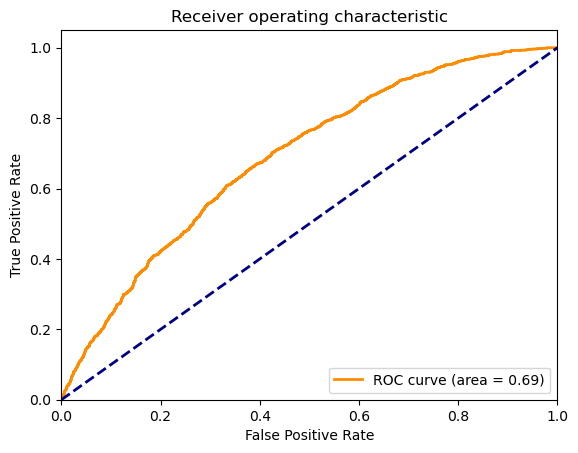

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# create confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred_binary)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues, values_format='.5g')

plt.show()
from sklearn.metrics import roc_curve, auc
# Compute the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Model :-3
# RandomForest Classifier Using Sk learn Library

In [62]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_Train, Y_Train)

y_pred = rand_clf.predict(X_Test)

Training accuracy of Random Forest is : 0.8548670082111025
Test accuracy of Random Forest is : 0.847880999158013
RF cohen_kappa_score : 0.01483401896926062
[[3016    1]
 [ 541    5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3017
           1       0.83      0.01      0.02       546

    accuracy                           0.85      3563
   macro avg       0.84      0.50      0.47      3563
weighted avg       0.85      0.85      0.78      3563



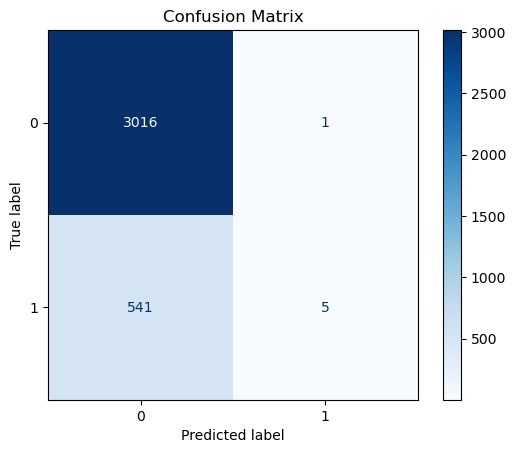

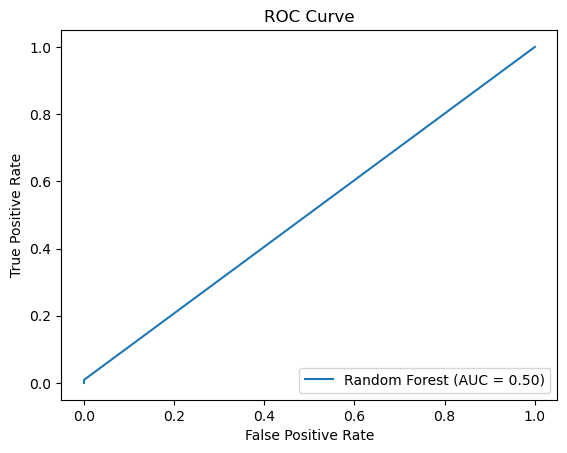

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay,cohen_kappa_score,roc_auc_score,ConfusionMatrixDisplay,roc_curve
from sklearn.ensemble import RandomForestClassifier


# Define the model
best_rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
best_rfc.fit(X_Train, Y_Train)

# Make predictions on the testing set
y_pred = best_rfc.predict(X_Test)

# Calculate accuracy and other metrics
rand_clf_train_acc = accuracy_score(Y_Train, best_rfc.predict(X_Train))
rand_clf_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))

print(classification_report(Y_Test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test, y_pred)



disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
disp.plot()
plt.title("ROC Curve")
plt.show()



## On over sampled data 


Training accuracy of Random Forest is : 1.0
Test accuracy of Random Forest is : 0.959880139836857
RF cohen_kappa_score : 0.919836846000918
[[2835  225]
 [  16 2931]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3060
           1       0.93      0.99      0.96      2947

    accuracy                           0.96      6007
   macro avg       0.96      0.96      0.96      6007
weighted avg       0.96      0.96      0.96      6007



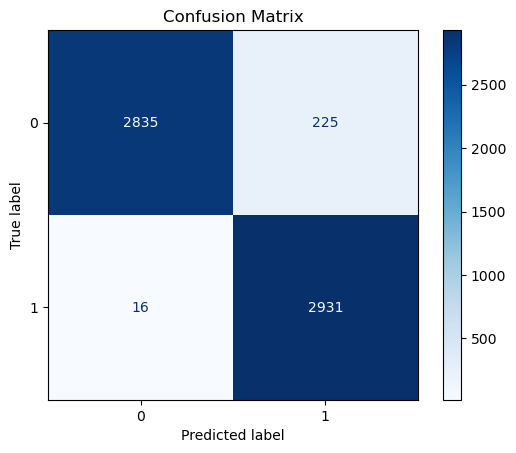

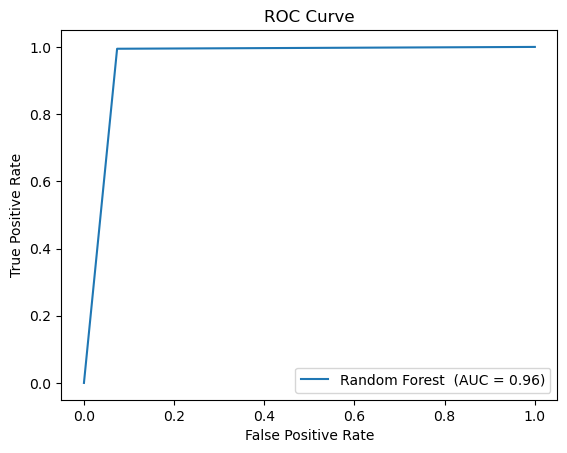

In [81]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_Train_1, Y_Train_1)

y_pred_1= rand_clf.predict(X_Test_1)

rand_clf_train_acc = accuracy_score(Y_Train_1, rand_clf.predict(X_Train_1))
rand_clf_test_acc = accuracy_score(Y_Test_1, y_pred_1)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_1)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test_1, y_pred_1))

print(classification_report(Y_Test_1, y_pred_1))
# Plot confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred_1, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred_1)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest ')
disp.plot()
plt.title("ROC Curve")
plt.show()


### As Random forest is producing best results Checking the Importance of feature 

In [83]:

importances=rand_clf.feature_importances_

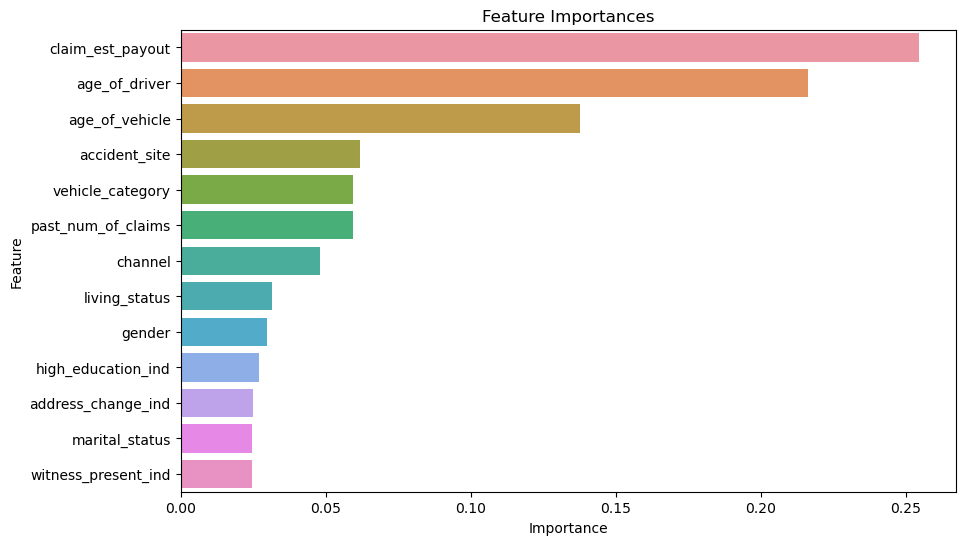

In [85]:
feature_importances = pd.DataFrame({'feature': X_Train_1.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Model -4   random Forest with H20 Library 

### a. Unbalanced data set 

In [65]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

h2o.init()
train_df = h2o.H2OFrame(pd.concat([X_Train, Y_Train], axis=1))
test_df = h2o.H2OFrame(pd.concat([X_Test, Y_Test], axis=1))

train_df['fraud']=train_df['fraud'].asfactor()
feature=train_df.columns
feature.remove('fraud')
target='fraud'
rfc = H2ORandomForestEstimator()
rfc.train(x=feature,y=target,training_frame=train_df)
y_pred = rfc.predict(test_df)

y_pred = rfc.predict(test_df)
y_pred_1 = y_pred['predict'].as_data_frame().values.flatten()



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.371-b11, mixed mode)
  Starting server from C:\Users\Aniket\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Aniket\AppData\Local\Temp\tmptbz_w1tj
  JVM stdout: C:\Users\Aniket\AppData\Local\Temp\tmptbz_w1tj\h2o_Aniket_started_from_python.out
  JVM stderr: C:\Users\Aniket\AppData\Local\Temp\tmptbz_w1tj\h2o_Aniket_started_from_python.err


C:\Users\Aniket\anaconda3\lib\site-packages\h2o\backend\server.py:386: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_Aniket_mfgj37
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |

C:\Users\Aniket\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [const]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [66]:
rfc_train_acc = rfc.model_performance(train_df).accuracy()[0][1]
rfc_test_acc = rfc.model_performance(test_df).accuracy()[0][1]
cohen_kappa = cohen_kappa_score(Y_Test, y_pred_1)
print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")


Training accuracy of Random Forest is : 0.9995789178187943
Test accuracy of Random Forest is : 0.8470390120684816


In [67]:
# Convert H2OFrame to pandas DataFrame
y_true = test_df['fraud'].as_data_frame().values.flatten()

# Convert H2OFrame to pandas DataFrame
y_pred = rfc.predict(test_df)['predict'].as_data_frame().values.flatten()

# Compute and print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion matrix:\n', cm)

# Compute and print classification report
cr = classification_report(y_true, y_pred)
print('Classification report:\n', cr)

# Compute and print Cohen's kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohen\'s kappa score:', kappa)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion matrix:
 [[1459 1558]
 [ 141  405]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.48      0.63      3017
           1       0.21      0.74      0.32       546

    accuracy                           0.52      3563
   macro avg       0.56      0.61      0.48      3563
weighted avg       0.80      0.52      0.58      3563

Cohen's kappa score: 0.10924619896111987


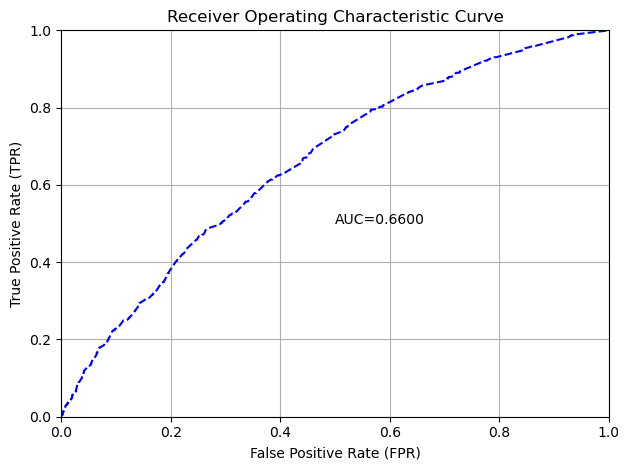

([0.0, 0.00033145508783559825, 0.00033145508783559825, 0.0006629101756711965, 0.0009943652635067948, 0.001325820351342393, 0.0019887305270135896, 0.002320185614849188, 0.002651640702684786, 0.002651640702684786, 0.002651640702684786, 0.002651640702684786, 0.0029830957905203847, 0.003646005966191581, 0.003646005966191581, 0.003977461054027179, 0.004308916141862778, 0.004640371229698376, 0.004971826317533974, 0.004971826317533974, 0.005303281405369572, 0.006297646668876367, 0.006297646668876367, 0.0069605568445475635, 0.0069605568445475635, 0.007292011932383162, 0.007623467020218761, 0.007954922108054359, 0.009280742459396751, 0.00961219754723235, 0.010275107722903546, 0.010606562810739144, 0.010606562810739144, 0.01160092807424594, 0.012595293337752734, 0.013921113689095127, 0.014252568776930727, 0.014584023864766324, 0.014915478952601922, 0.01557838912827312, 0.015909844216108717, 0.016572754391779913, 0.018230029830957905, 0.018561484918793503, 0.0188929400066291, 0.0192243950944647, 

In [68]:
print(rfc.model_performance(test_data=test_df).plot())



In [69]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

h2o.init()
train_df = h2o.H2OFrame(pd.concat([X_Train_1, Y_Train_1], axis=1))
test_df = h2o.H2OFrame(pd.concat([X_Test_1, Y_Test_1], axis=1))

train_df['fraud']=train_df['fraud'].asfactor()
feature=train_df.columns
feature.remove('fraud')
target='fraud'
rfc = H2ORandomForestEstimator()
rfc.train(x=feature,y=target,training_frame=train_df)
y_pred = rfc.predict(test_df)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,35 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_Aniket_mfgj37
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,205.4 Mb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\Aniket\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [const]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [70]:
y_pred = rfc.predict(test_df)
y_pred_1 = y_pred['predict'].as_data_frame().values.flatten()

X_1= X_train_result
Y_1= y_train_result
X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_1,Y_1,test_size = 0.2,  random_state=42)
X_Train_1.shape, X_Test_1.shape, Y_Train_1.shape, Y_Test_1.shape

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


((24027, 13), (6007, 13), (24027,), (6007,))

In [71]:
rfc_train_acc = rfc.model_performance(train_df).accuracy()[0][1]
rfc_test_acc = rfc.model_performance(test_df).accuracy()[0][1]
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_1)
print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")
# Convert H2OFrame to pandas DataFrame
y_true = test_df['fraud'].as_data_frame().values.flatten()

# Convert H2OFrame to pandas DataFrame
y_pred = rfc.predict(test_df)['predict'].as_data_frame().values.flatten()

# Compute and print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion matrix:\n', cm)

# Compute and print classification report
cr = classification_report(y_true, y_pred)
print('Classification report:\n', cr)

# Compute and print Cohen's kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohen\'s kappa score:', kappa)


Training accuracy of Random Forest is : 0.9997086610896075
Test accuracy of Random Forest is : 0.9863492591976027
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion matrix:
 [[3023   37]
 [  46 2901]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3060
           1       0.99      0.98      0.99      2947

    accuracy                           0.99      6007
   macro avg       0.99      0.99      0.99      6007
weighted avg       0.99      0.99      0.99      6007

Cohen's kappa score: 0.9723542321899382


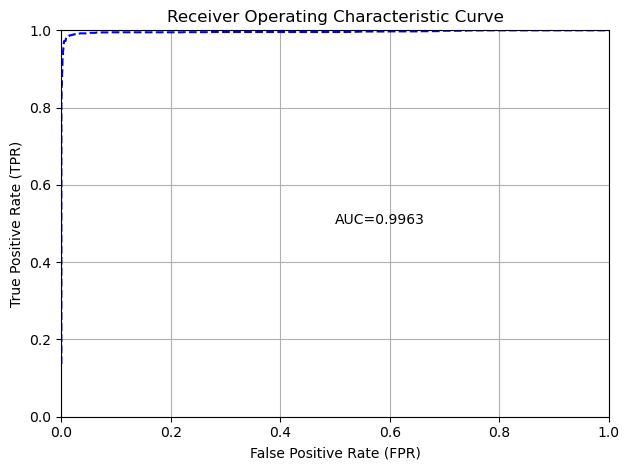

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000326797385620915, 0.000980392156862745, 0.000980392156862745, 0.000980392156862745, 0.000980392156862745, 0.000980392156862745, 0.00130718954248366, 0.00130718954248366, 0.00130718954248366, 0.00130718954248366, 0.00130718954248366, 0.0016339869281045752, 0.0016339869281045752, 0.0016339869281045752, 0.0016339869281045752, 0.0016339869281045752, 0.0016339869281045752, 0.0016339869281045752, 0.0016339869

In [72]:
print(rfc.model_performance(test_data=test_df).plot())


#  Model :- 5:- XG boost 

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBClassifier model
xgb = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_Train, Y_Train)
# Print best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}


In [74]:
# Get best estimator and predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_Test)

# Compute train and test accuracy and Cohen's kappa score
xgb_train_acc = accuracy_score(Y_Train, best_xgb.predict(X_Train))
xgb_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

# Print results
print(f"Training accuracy of tuned XGBoost is: {xgb_train_acc}")
print(f"Test accuracy of tuned XGBoost is: {xgb_test_acc}")
print(f"Tuned XGBoost Cohen's kappa score: {cohen_kappa}")

# Print confusion matrix and classification report
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

Training accuracy of tuned XGBoost is: 0.8464453645869886
Test accuracy of tuned XGBoost is: 0.847880999158013
Tuned XGBoost Cohen's kappa score: 0.04376369131797142
[[3004   13]
 [ 529   17]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3017
           1       0.57      0.03      0.06       546

    accuracy                           0.85      3563
   macro avg       0.71      0.51      0.49      3563
weighted avg       0.81      0.85      0.79      3563



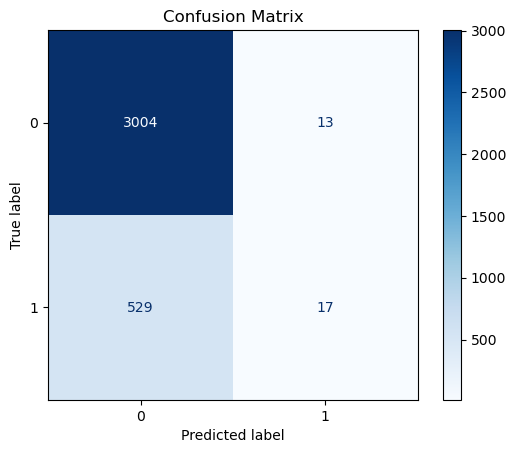

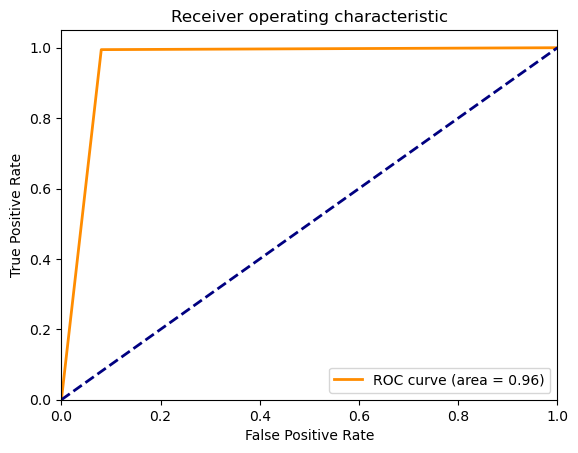

In [75]:
# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




### On over sampled data 

In [76]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBClassifier model
xgb = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_Train_1, Y_Train_1)
# Print best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1}


In [77]:
# Get best estimator and predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_Test_1)

# Compute train and test accuracy and Cohen's kappa score
xgb_train_acc = accuracy_score(Y_Train_1, best_xgb.predict(X_Train_1))
xgb_test_acc = accuracy_score(Y_Test_1, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred)

# Print results
print(f"Training accuracy of tuned XGBoost is: {xgb_train_acc}")
print(f"Test accuracy of tuned XGBoost is: {xgb_test_acc}")
print(f"Tuned XGBoost Cohen's kappa score: {cohen_kappa}")

# Print confusion matrix and classification report
print(confusion_matrix(Y_Test_1, y_pred))
print(classification_report(Y_Test_1, y_pred))

Training accuracy of tuned XGBoost is: 0.9049402755233695
Test accuracy of tuned XGBoost is: 0.8205427001831197
Tuned XGBoost Cohen's kappa score: 0.6420035760136193
[[2288  772]
 [ 306 2641]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      3060
           1       0.77      0.90      0.83      2947

    accuracy                           0.82      6007
   macro avg       0.83      0.82      0.82      6007
weighted avg       0.83      0.82      0.82      6007



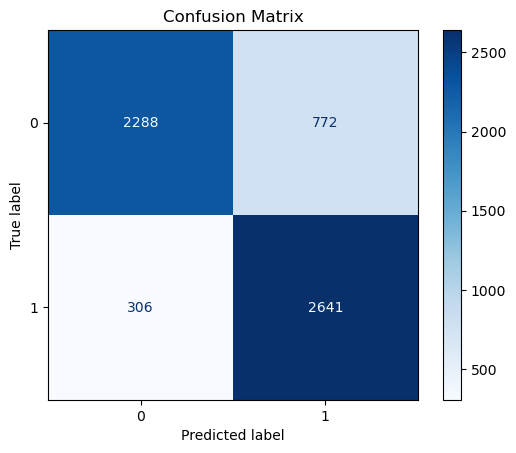

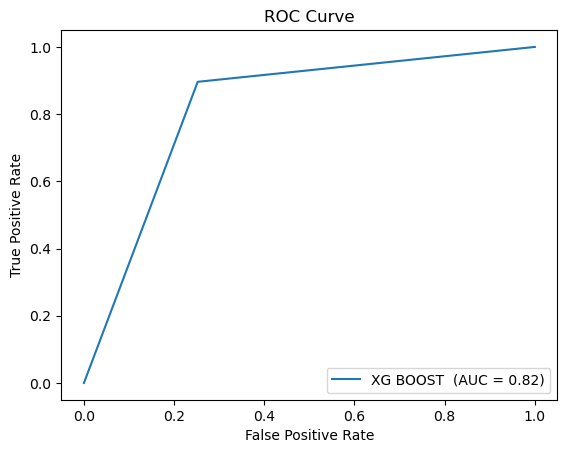

In [78]:

# Plot confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XG BOOST ')
disp.plot()
plt.title("ROC Curve")
plt.show()

## Summary of ALL model on balanced data set 
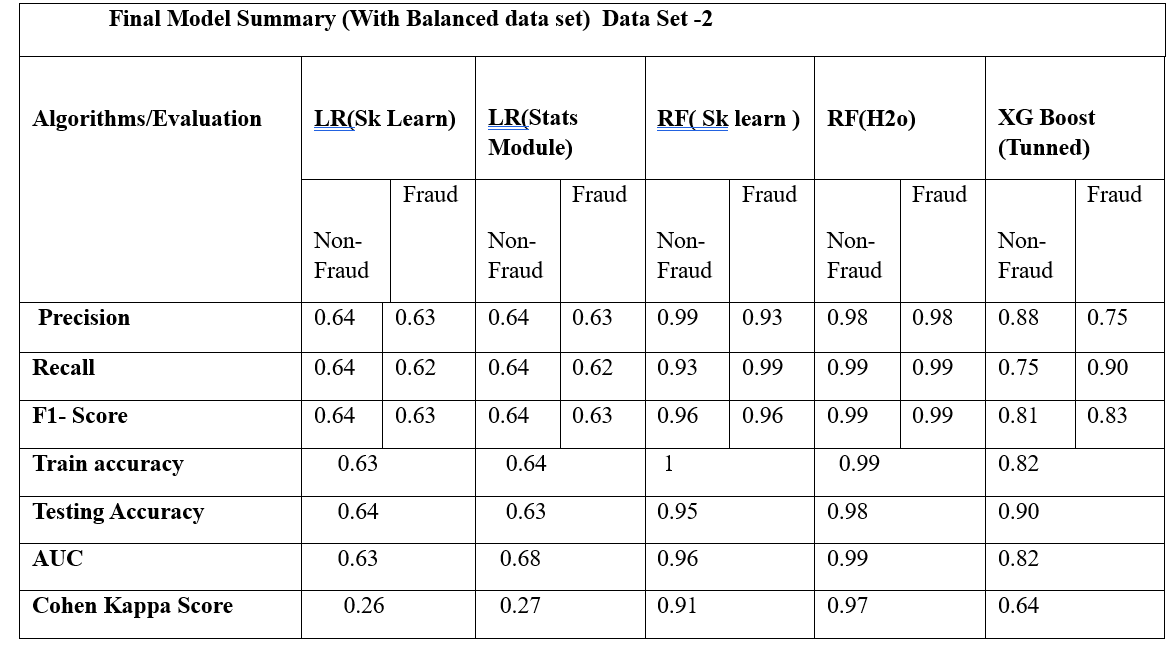

## End of the code 